# **CNN MODEL ON MNIST DATASET FOR WRITTEN DIGIT CLASSIFICATION.**

***1. Model without convolution.***

MNIST DATASET IS THE HANDWRITTEN NUMBERS TAKEN AS IMAGES. ALL IMAGES ARE GREY SCALE.

IMPORTING LIBRARIES.

In [3]:
# importing mnist dataset, sequential model, dense layers, to_categorical from keras library.
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

# importing numpy and importing matplotlib.pyplot for visualization.
import numpy as np
import matplotlib.pyplot as plt

LOAD THE DATASET MNIST.

In [4]:
# loading the mnist dataset.
(X_train, y_train),(X_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


DATA DETAILS.

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


IMAGE FORMAT.

In [6]:
X_train[0].shape

(28, 28)

DATA IN TRAINING SETS.

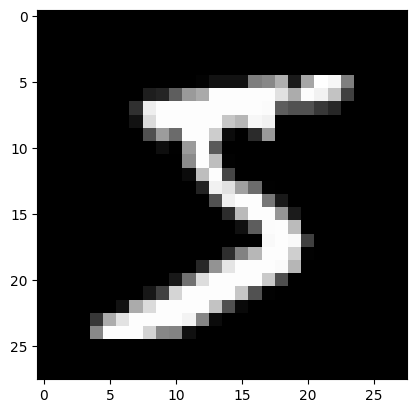

In [7]:
plt.imshow(X_train[0],cmap="gray")

In [8]:
y_train[0]

5

PRE-PROCESSING THE IMAGE DATA.

In [9]:
image_height, image_width=28,28

In [10]:
X_train=X_train.reshape(60000, image_height*image_width)
X_test=X_test.reshape(10000, image_height*image_width)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [11]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [12]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [13]:
X_train/=255.0
X_test/=255.0

In [14]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [15]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


CONVERTING THE TARGET VALUE INTO 10 BINS.
THE MODEL OUTPUTS WILL GO INTO ONE OF THESE BINS.

In [16]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

BUILDING THE MODEL.

In [18]:
# This is topology of normal nn with 2 hidden layers and 1 output layer.
model=Sequential()
# we are using the relu activation function in the hidden layers.
model.add(Dense(512, activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
# In the output, we are using softmax activation function as it is multiclass classifier.
model.add(Dense(10,activation="softmax"))

COMPILE THE MODEL.

In [19]:
# compiling the model.
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# fitting the data to the model with 20 epochs.
history= model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 9s 3ms/step - loss: 0.1834 - accuracy: 0.9442 - val_loss: 0.1070 - val_accuracy: 0.9681
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0806 - accuracy: 0.9757 - val_loss: 0.0793 - val_accuracy: 0.9764
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0550 - accuracy: 0.9826 - val_loss: 0.0823 - val_accuracy: 0.9780
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0431 - accuracy: 0.9858 - val_loss: 0.0770 - val_accuracy: 0.9783
Epoch 5/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0334 - accuracy: 0.9896 - val_loss: 0.0908 - val_accuracy: 0.9786
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.1062 - val_accuracy: 0.9759
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0246 - accuracy: 0.9923 - val_loss: 0.0812 - val_accuracy:

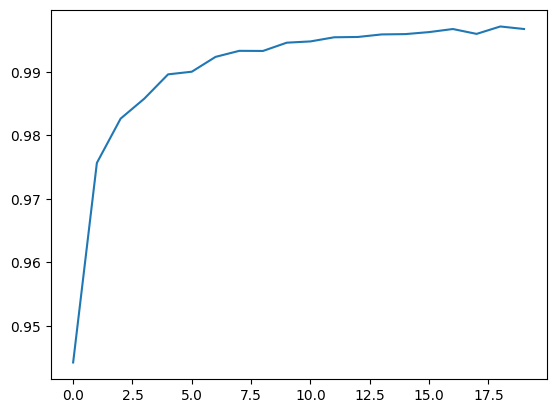

In [21]:
plt.plot(history.history['accuracy'])

EVALUATING THE MODEL.

In [22]:
score= model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1323 - accuracy: 0.9827


''' After training the data with normal neural network model, we are getting 0.9827 accuracy after 20 epochs.'''

IN NN, WE ONLY HAVE FULLY CONNECTED LAYER. WITH CNN, WE HAVE MORE OPERATIONS SUCH AS THE CONVOLUTION OPERATION, MAX POOLING, FLATTENING AND ALSO FULLY CONNECTED LAYER.

''' As image is the collection of pixels, the image data is more. sometimes, we are unable to train with the normal neural networks. '''

''' To avoid this drawback, we are using cnn in which we have a convolution and pooling layers. '''

''' convolution: Extraction of key features from the image data. '''

''' pooling helps to downsampling. '''

''' To avoid some drawbacks in this process, we are using relu function, pooling layer, padding technique. '''

In [23]:
# We are importing convolution, pooling, flatten layers from keras other than in the normal nn. The rest is same as normal nn.
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [24]:
# loading the data.
(X_train, y_train),(X_test, y_test)=mnist.load_data()

In [25]:
# Data details.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [26]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [27]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [28]:
X_train/=255.0
X_test/=255.0

In [29]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


''' All the above steps are common in the normal nn model. '''

CNN MODEL DEVELOPMENT.

In [31]:
cnn=Sequential()
# creating convolution layers with filter(kernel) size 3*3.
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1),padding='same',activation='relu'))
# applying max pooling technique.
cnn.add(MaxPooling2D())
# creating convolution layers with filter(kernel) size 3*3.
cnn.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
# applying max pooling technique.
cnn.add(MaxPooling2D())
# Flatten layers to give input to the normal nn that is fully connected layer.
cnn.add(Flatten())
# In nn, we have one hidden layer with relu activation function.
cnn.add(Dense(64, activation='relu'))
# As the output is 10 labels which is multiclass, we are used softmax activation function.
cnn.add(Dense(10,activation='softmax'))
# For better accuracy, we are adding adam optimizer.
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# suumary
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [32]:
# Here, we are training with just 12 epochs where in normal nn, we did in 20 epochs.
history_cnn=cnn.fit(X_train, y_train, epochs=12, verbose=1, validation_data=(X_train, y_train))

Epoch 1/12
1875/1875 [==============================] - 14s 6ms/step - loss: 0.1557 - accuracy: 0.9531 - val_loss: 0.0669 - val_accuracy: 0.9793
Epoch 2/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0506 - accuracy: 0.9840 - val_loss: 0.0313 - val_accuracy: 0.9906
Epoch 3/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0345 - accuracy: 0.9892 - val_loss: 0.0227 - val_accuracy: 0.9932
Epoch 4/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.0158 - val_accuracy: 0.9953
Epoch 5/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0223 - val_accuracy: 0.9935
Epoch 6/12
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.0182 - val_accuracy: 0.9942
Epoch 7/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.0120 - val_acc

''' Even though we used less epochs then the normal nn model, we get better accuracy then before. '''

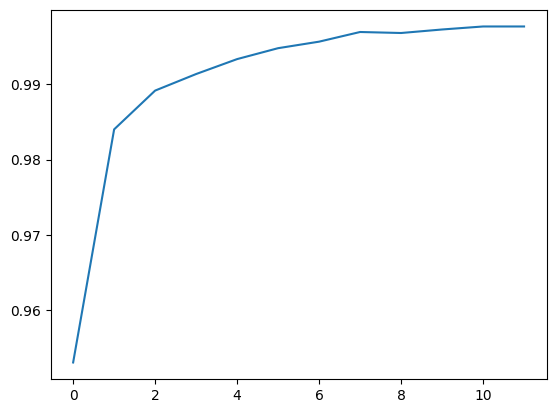

In [33]:
plt.plot(history_cnn.history['accuracy'])

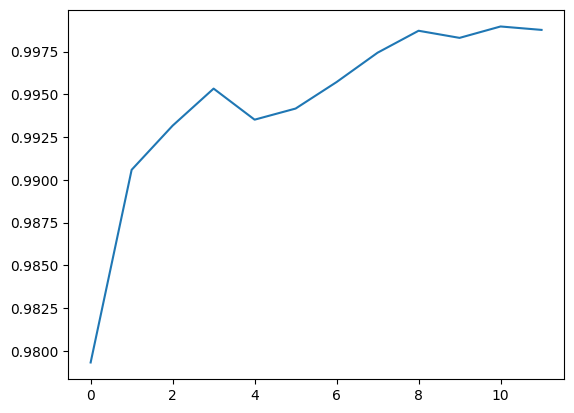

In [34]:
plt.plot(history_cnn.history['val_accuracy'])

HENCE, THE CONVOLUTION NEURAL NETWORK HELPS IN THE IMAGE CLASSIFICATION BETTER THAN THE NORMAL NEURAL NETWORK.